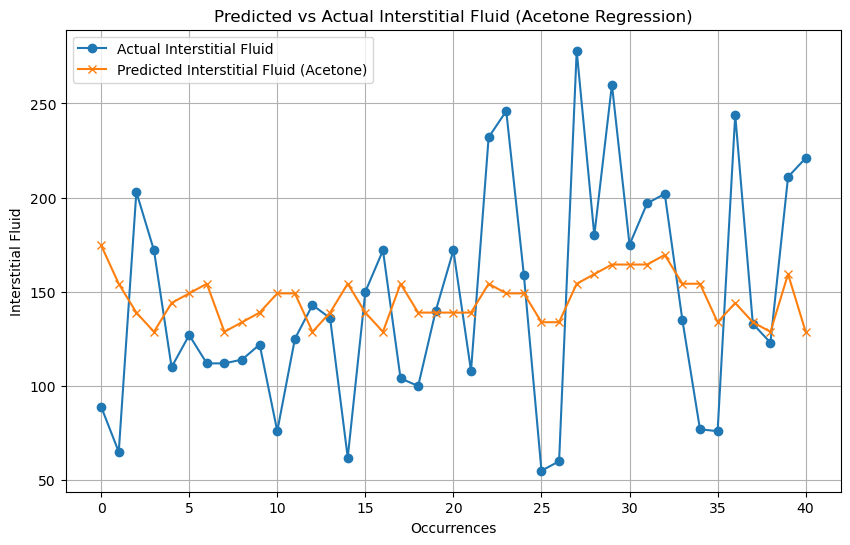

                            OLS Regression Results                            
Dep. Variable:      Interstital Fluid   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.833
Date:                Mon, 12 Aug 2024   Prob (F-statistic):              0.184
Time:                        13:50:09   Log-Likelihood:                -224.00
No. Observations:                  41   AIC:                             452.0
Df Residuals:                      39   BIC:                             455.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 128.7563    

In [10]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Moni.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Prepare the data (only using "Acetone ketones ppm")
X = df[["Acetone ketones ppm"]]
y = df["Interstital Fluid"]

# Add a constant to the independent variable
X = sm.add_constant(X)

# Create the simple linear regression model and fit it
model = sm.OLS(y, X).fit()

# Get the summary of the model
summary = model.summary()

# Predict the interstitial fluid using the regression model
df['Predicted Interstitial Fluid (Acetone)'] = model.predict(X)

# Prepare the next data point for prediction (using the last acetone value)
next_data_point = pd.DataFrame([X.iloc[-1, 1:].values], columns=X.columns[1:])
next_data_point = sm.add_constant(next_data_point, has_constant='add')
next_prediction = model.predict(next_data_point)[0]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Interstital Fluid'], label='Actual Interstitial Fluid', marker='o')
plt.plot(df.index, df['Predicted Interstitial Fluid (Acetone)'], label='Predicted Interstitial Fluid (Acetone)', marker='x')
plt.xlabel('Occurrences')
plt.ylabel('Interstitial Fluid')
plt.title('Predicted vs Actual Interstitial Fluid (Acetone Regression)')
plt.legend()
plt.grid(True)
plt.show()

# Generate the formula equation in Excel format
coefficients = model.params
excel_formula = f"={coefficients['const']} + ({coefficients['Acetone ketones ppm']} * A2)"

# Output the summary, next prediction, and Excel formula
print(summary)
print(f"Next predicted interstitial fluid reading: {next_prediction}")
print("\nExcel Formula:")
print(excel_formula)
